In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

import qiskit
import qiskit.quantum_info as qi
# Tomography functions
from qiskit.providers.aer.noise import NoiseModel
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import DensityMatrix

from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import *

# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

In [3]:
#Create cat states
n = 5
vectors = []
circuits = []
for i in range(2, n + 1):
    cir = QuantumCircuit(i)
    cir.h(0)
    for j in range(0, i - 1):
        cir.cx(j, j + 1)
    circuits.append(cir)
    vectors.append(qi.Statevector.from_instruction(cir))
drawings = []
for i in range(len(circuits)):
    drawings.append(circuits[i].draw(output='mpl'))

In [4]:
tomo_circuits = []
for cir in circuits:
    tomo_circuits.append(state_tomography_circuits(cir, cir.qubits));

c:\python-interpreters\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
c:\python-interpreters\lib\site-packages\qiskit\circuit\quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
c:\python-interpreters\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
c:\python-interpreters\lib\site-packages\qiski

In [6]:
#Simulator
name = 'ibm_lagos'
results = []
backend = provider.get_backend(name)
noise_model = NoiseModel.from_backend(backend)
full_layout = [0, 1, 3, 5, 4, 2, 6]
# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates
qcomp = Aer.get_backend("qasm_simulator")
for group in tomo_circuits:
    layout = full_layout[:group[0].num_qubits]
    results.append(qiskit.execute(group, Aer.get_backend('qasm_simulator'),
                                  coupling_map=coupling_map,
                                  basis_gates=basis_gates,
                                  noise_model=noise_model, initial_layout=layout, shots=8000).result())

In [ ]:
#Real
from qiskit.tools import job_monitor
import utility
name = 'ibm_lagos'
results = []
backend = provider.get_backend(name)
full_layout = [0,1,3,5,4,2,6]
for group in tomo_circuits:
    layout = full_layout[:group[0].num_qubits]
    job = qiskit.execute(group, backend,initial_layout=layout,shots=8000)
    job_monitor(job)
    utility.save_job(job,"Jakarta_fidelity_to_qubits_withMap_(3)")
    results.append(job.result())



Job Status: job is queued (1)     

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\BarIlan\Qiskit\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\david\AppData\Local\Temp/ipykernel_2024/868463500.py", line 11, in <module>
    job_monitor(job)
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\tools\monitor\job_monitor.py", line 89, in job_monitor
    _text_checker(
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\tools\monitor\job_monitor.py", line 45, in _text_checker
    status = job.status()
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\providers\ibmq\job\ibmqjob.py", line 502, in status
    api_response = self._api_client.job_status(self.job_id())
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\providers\ibmq\api\clients\account.py", line 332, in job_status
    return self.account_api.job(job_id).status()
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\providers\ibmq\api\rest\job.py", line 160, in status
   

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\BarIlan\Qiskit\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\david\AppData\Local\Temp/ipykernel_2024/868463500.py", line 11, in <module>
    job_monitor(job)
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\tools\monitor\job_monitor.py", line 89, in job_monitor
    _text_checker(
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\tools\monitor\job_monitor.py", line 45, in _text_checker
    status = job.status()
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\providers\ibmq\job\ibmqjob.py", line 502, in status
    api_response = self._api_client.job_status(self.job_id())
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\providers\ibmq\api\clients\account.py", line 332, in job_status
    return self.account_api.job(job_id).status()
  File "D:\BarIlan\Qiskit\lib\site-packages\qiskit\providers\ibmq\api\rest\job.py", line 160, in status
   

In [19]:
#Retriev
#Retrive results:
import utility
results = [utility.retrieve("Jakarta_fidelity_to_qubits_withMap_2").result(),
           utility.retrieve("Jakarta_fidelity_to_qubits_withMap_20").result(),
           utility.retrieve("Jakarta_fidelity_to_qubits_withMap_21").result(),
           utility.retrieve("Jakarta_fidelity_to_qubits_withMap_22").result()]


Retrieved from memory
Retrieved from memory
Retrieved from memory
Retrieved from memory


In [7]:
from Tomography import tomography
densities = []
fidelities = {}
purities = {}
for i in range(len(results)):
    tomo_fitter_bell = StateTomographyFitter(results[i], tomo_circuits[i]).fit(method='lstsq')
    densities.append(DensityMatrix(tomo_fitter_bell))
    temp_dict = {i + 2: (tomography.calc_fidelity(DensityMatrix(tomo_fitter_bell), vectors[i]))}
    temp_dict_pure = {i + 2: (tomography.calc_purity(DensityMatrix(tomo_fitter_bell)))}
    fidelities.update(temp_dict)
    purities.update(temp_dict_pure)
print(fidelities)


c:\python-interpreters\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{2: 0.8924937200959103, 3: 0.8497480538390719, 4: 0.8022976740034872, 5: 0.7513375631767482}


 
-0.04709 x + 0.9888
 
(-0.0464 + -3.098e-21j) x + (0.9885 + 1.211e-20j)


c:\python-interpreters\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\python-interpreters\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


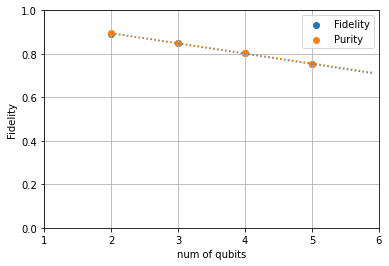

In [10]:
#Draw
plt.scatter(fidelities.keys(), fidelities.values())
plt.scatter(purities.keys(), purities.values())
plt.axis([1, 6, 0, 1])
plt.ylabel('Fidelity')
plt.xlabel('num of qubits')
plt.legend(["Fidelity", "Purity"])
plt.grid(True)

x = np.linspace(2, 6, 50, False)
poly_f = np.polyfit(list(fidelities.keys()), list(fidelities.values()),1)
poly_p = np.polyfit(list(purities.keys()), list(purities.values()),1)
trendpoly_f = np.poly1d(poly_f)
trendpoly_p = np.poly1d(poly_p)
print(trendpoly_f)
print(trendpoly_p)
plt.plot(x,trendpoly_f(x),':')
plt.plot(x,trendpoly_p(x),':')
#plt.plot(fidelities)
plt.show()

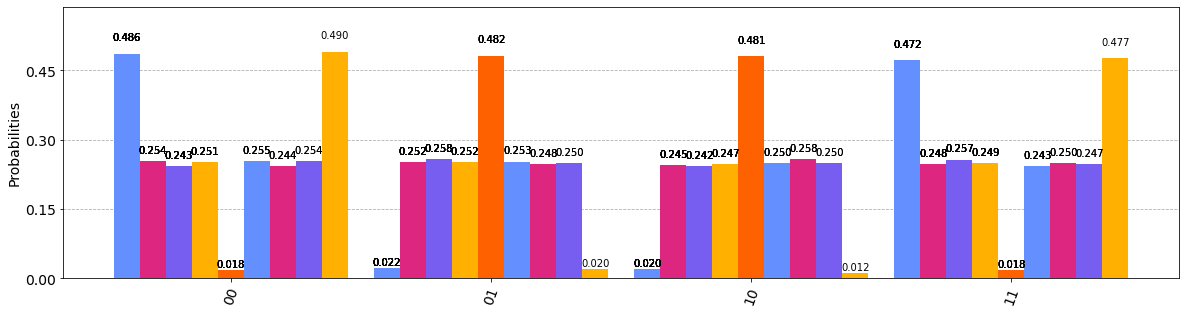

In [16]:
plot_histogram(results[0].get_counts(), figsize=(20,5))
